## Модели искусственного интеллекта для бизнеса. Лекция 1

Для запуска примеров необходимы библиотеки numpy, pandas и scikit-learn

#### 1. Линейная регрессия. Одномерный случай

$$ X = N(0,1) \\ Y = 3 + 0.5 * X + noise $$

In [1]:
# импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# создаем искусственный пример

mu = 0.0
sigma = 1.0
size = 100
noise = 0.5 * np.random.normal(loc = 0.0, scale = 1.0, size = (size,1))

X = np.random.normal(loc = mu, scale = sigma, size = (size,1))
Y = 3 + 0.5 * X + noise

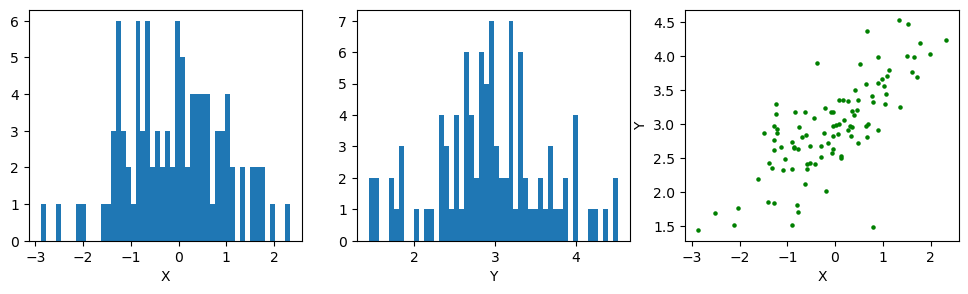

In [3]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,3))
ax[0].hist(X, bins = 50);
ax[0].set_xlabel('X');
ax[1].hist(Y, bins = 50);
ax[1].set_xlabel('Y');
ax[2].scatter(X, Y, s = 5.0, color = 'g');
ax[2].set_xlabel('X');
ax[2].set_ylabel('Y');

In [4]:
# импортируем модель линейной регрессии из sklearn

from sklearn.linear_model import LinearRegression

# импортируем метрики MSE и R^2
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
lr = LinearRegression()

lr.fit(X, Y)

print(f'a = {lr.intercept_[0] :.3f}')
print(f'b = {lr.coef_[0][0] :.3f}')

a = 2.990
b = 0.499


In [6]:
# предсказание на обучающих данных
y_pred = lr.predict(X)
mse = mean_squared_error(Y, y_pred)
print(f'Ошибка на обучающих данных: MSE = {mse :.3f}, RMSE = {np.sqrt(mse) :.3f}')

# предсказание на новых данных
X1 = np.random.normal(loc = mu, scale = sigma, size = (size,1))
Y1 = 3 + 0.5 * X1 + noise
y1_pred = lr.predict(X1)
mse1 = mean_squared_error(Y, y1_pred)
print(f'Ошибка на новых данных    : MSE = {mse1 :.3f}, RMSE = {np.sqrt(mse1) :.3f}')

Ошибка на обучающих данных: MSE = 0.201, RMSE = 0.449
Ошибка на новых данных    : MSE = 0.652, RMSE = 0.808


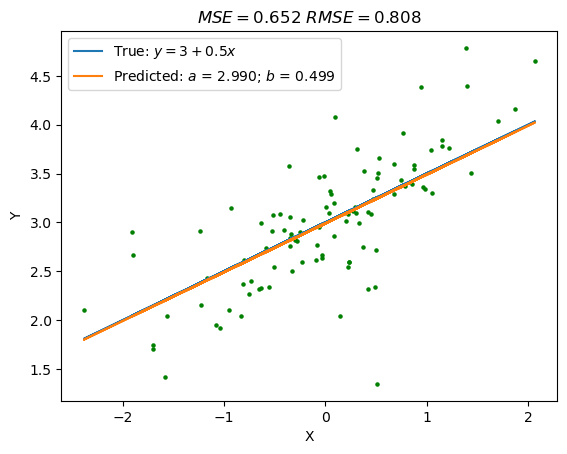

In [7]:
plt.scatter(X1, Y1, s = 5, c = 'g')
plt.plot(X1, 3 + 0.5 * X1, label = 'True: $y = 3 + 0.5x$')
plt.plot(X1, y1_pred, label = f'Predicted: $a$ = {lr.intercept_[0] :.3f}; $b$ = {lr.coef_[0][0] :.3f}')
plt.xlabel('X'); plt.ylabel('Y');
plt.title(f'$MSE=${mse1 :.3f} $RMSE=${np.sqrt(mse1) :.3f}');
plt.legend();

#### 2. Линейная регрессия. Многомерный случай

In [39]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(download_if_missing = True, return_X_y = True, as_frame = True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [40]:
# Разделим данные на обучающую и валидационную выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


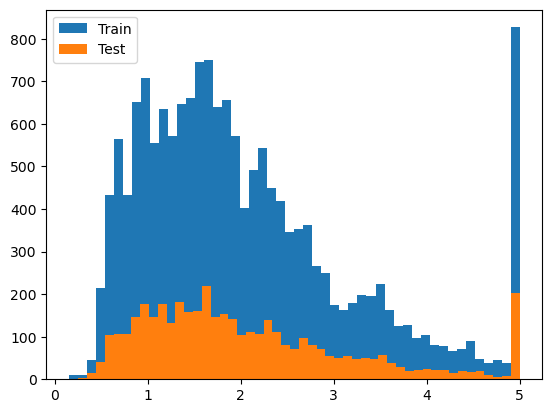

In [41]:
plt.hist(y_train, bins = 50, label = "Train");
plt.hist(y_test, bins = 50, label = "Test");
plt.legend();

In [42]:
pd.concat([X_train, y_train], axis = 1).corr(method = 'spearman').style.background_gradient().format(precision=3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000,-0.146,0.649,-0.248,0.008,-0.050,-0.088,-0.014,0.677
HouseAge,-0.146,1.000,-0.228,-0.124,-0.288,-0.020,0.032,-0.148,0.073
AveRooms,0.649,-0.228,1.000,0.084,-0.110,0.013,0.127,-0.048,0.268
AveBedrms,-0.248,-0.124,0.084,1.000,0.025,-0.128,0.051,0.010,-0.126
Population,0.008,-0.288,-0.110,0.025,1.000,0.234,-0.122,0.122,0.008
AveOccup,-0.050,-0.020,0.013,-0.128,0.234,1.000,-0.151,0.179,-0.257
Latitude,-0.088,0.032,0.127,0.051,-0.122,-0.151,1.000,-0.878,-0.166
Longitude,-0.014,-0.148,-0.048,0.010,0.122,0.179,-0.878,1.000,-0.072
MedHouseVal,0.677,0.073,0.268,-0.126,0.008,-0.257,-0.166,-0.072,1.000


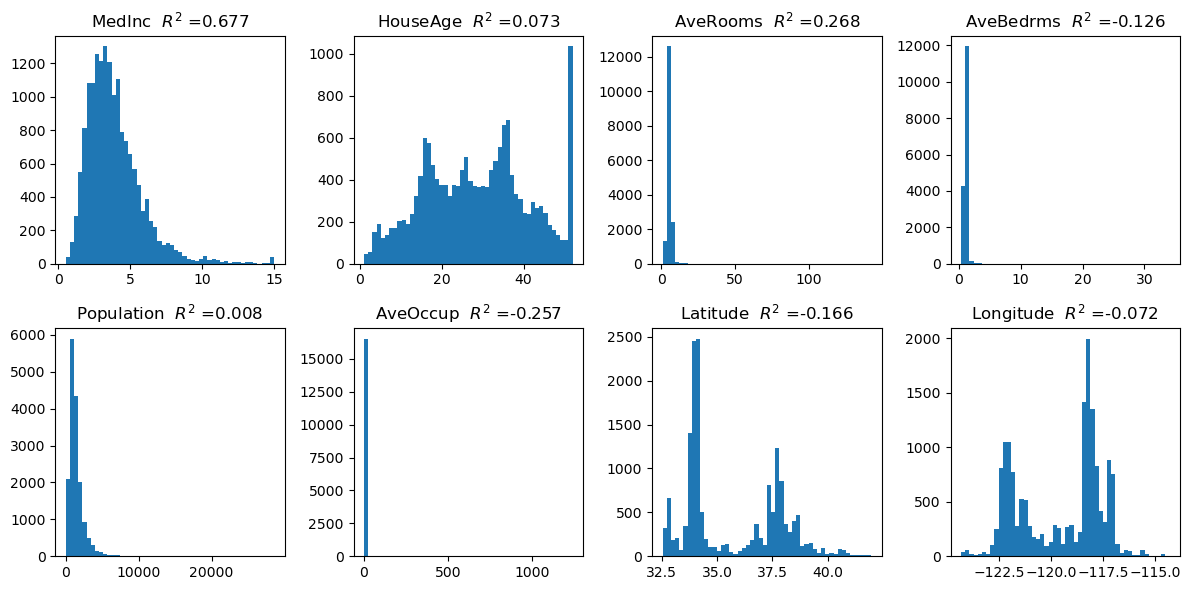

In [43]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (12,6))
axes = axes.flatten()

r_squad = pd.concat([X_train, y_train], axis = 1).corr(method = 'spearman')['MedHouseVal']

for c, ax  in zip(X_train.columns, axes):
    ax.hist(X_train[c], bins = 50);
    ax.set_title(c + f'  $R^2$ ={r_squad[c] :.3f}');
fig.tight_layout()    

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)
print(f'Ошибка на обучающих данных: MSE = {mse :.3f}, RMSE = {np.sqrt(mse) :.3f}')

y_test_pred = lr.predict(X_test)

mse1 = mean_squared_error(y_test, y_test_pred)
print(f'Ошибка на тестовых данных: MSE = {mse1 :.3f}, RMSE = {np.sqrt(mse1) :.3f}')

Ошибка на обучающих данных: MSE = 0.526, RMSE = 0.725
Ошибка на тестовых данных: MSE = 0.520, RMSE = 0.721


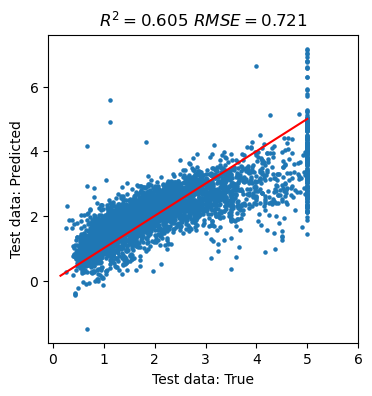

In [45]:
plt.figure(figsize = (4,4))
plt.scatter(y_test, y_test_pred, s = 5);
plt.plot([y.min(), y.max()],[y.min(), y.max()], c  = 'r');
plt.xlabel('Test data: True');
plt.ylabel('Test data: Predicted');
plt.xticks([0,1,2,3,4,5,6]);
plt.title(f'$R^2=${r2_score(y_test, y_test_pred) :.3f} $RMSE=${np.sqrt(mean_squared_error(y_test, y_test_pred)) :.3f}');

In [15]:
print(f'Intercept : {lr.intercept_:6.3f}')
for c, b in zip(X_train.columns, lr.coef_):
    print(f'{c :10s}: {b :6.3f}')

Intercept : -37.665
MedInc    :  0.445
HouseAge  :  0.010
AveRooms  : -0.119
AveBedrms :  0.800
Population: -0.000
AveOccup  : -0.004
Latitude  : -0.426
Longitude : -0.441


#### 3. Классификация. Логистическая регрессия

In [16]:
df = pd.read_csv('Data/01_Bankrupts.csv', sep = ';', decimal = ',')
print('Total = {:3d} Failures = {:3d} Features = {:2d}'.format(df.shape[0],df[df.Failure == 1].Failure.count(), df.shape[1]-1))

Total = 2457 Failures = 456 Features = 12


In [17]:
df.head(5)

,Coefficient of current liquidity,Quick liquidity ratio,Absolute liquidity ratio,Receivables turnover ratio,Turnover ratio of funds,Ratio of own and borrowed funds,Ratio of own working capital,Coefficient of autonomy,Degree of solvency in current liabilities,Return on net assets by net profit,Profitability,Profitability of sales,Failure
0,1.855297,0.494782,0.119245,7.863329,2.378774,10.701323,-0.393346,0.085460,2.710659,0.114223,0.158457,0.040158,0
1,2.195106,1.759928,0.225398,3.939042,2.901973,1.073411,-0.820014,0.482297,1.944815,0.129966,0.166586,0.165311,0
2,0.545857,0.501226,0.004405,2.400745,2.093566,1.642198,-0.956347,0.378473,15.555059,0.283075,0.285632,0.252717,0
3,2.075219,1.738613,0.060913,2.934117,2.360521,1.506217,0.310222,0.399008,2.584489,0.246798,0.308379,0.051204,0
4,0.327850,0.203118,0.007089,3.587563,1.706058,-2.511514,-2.074966,-0.661588,21.478828,0.888498,1.030045,0.118537,0


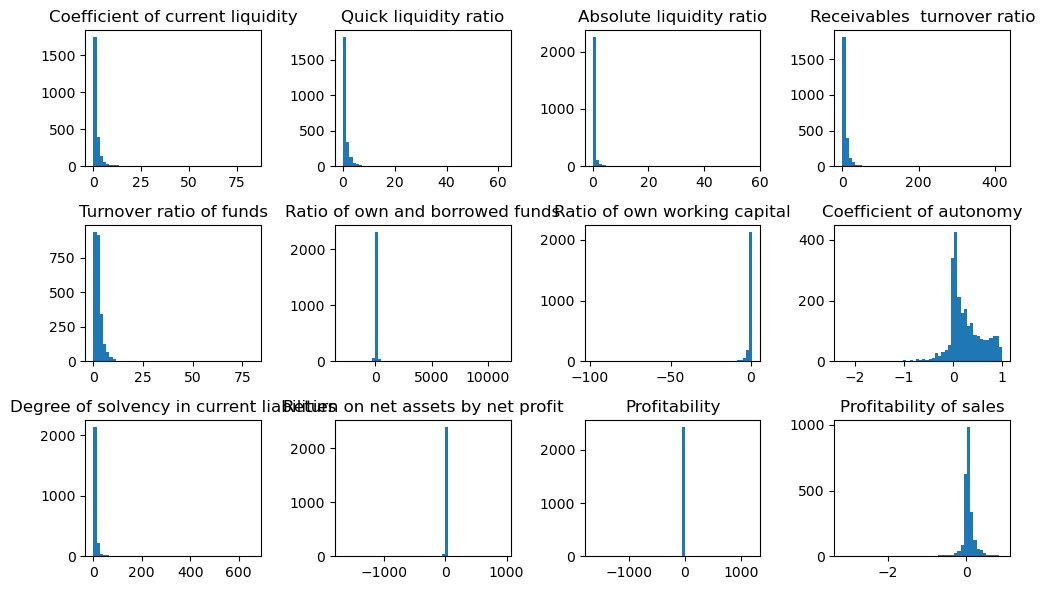

In [18]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (10,6))
axes = axes.flatten()

# r_squad = pd.concat([X_train, y_train], axis = 1).corr(method = 'spearman')['MedHouseVal']

for c, ax  in zip(df.columns[:-1], axes):
    ax.hist(df[c], bins = 50);
    ax.set_title(c);
fig.tight_layout()  

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [20]:
X = df.drop(['Failure'], axis = 1)
y = df.Failure

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(f'Imblance: Total {(y == 1).sum() / (y == 0).sum() :.3f} Train {(y_train == 1).sum() / (y_train == 0).sum() :.3f} Test {(y_test == 1).sum() / (y_test == 0).sum() :.3f}')

(1842, 12) (1842,)
(615, 12) (615,)
Imblance: Total 0.228 Train 0.228 Test 0.228


In [21]:
logr = LogisticRegression(solver = 'liblinear', random_state = 1)

logr.fit(X_train, y_train)

y_pred_train = logr.predict(X_train)
y_pred_test  = logr.predict(X_test)

print(f'Accuracy: Train {accuracy_score(y_train, y_pred_train) :.3f} Test {accuracy_score(y_test, y_pred_test) :.3f}')

Accuracy: Train 0.824 Test 0.837


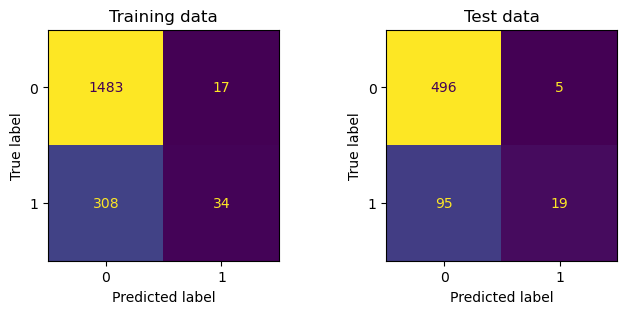

In [22]:
fig, ax =  plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))

_ = ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, display_labels = logr.classes_, ax = ax[0], colorbar = False)
_ = ConfusionMatrixDisplay.from_predictions(y_test,  y_pred_test,  display_labels = logr.classes_, ax = ax[1], colorbar = False)
ax[0].set_title('Training data');
ax[1].set_title('Test data');

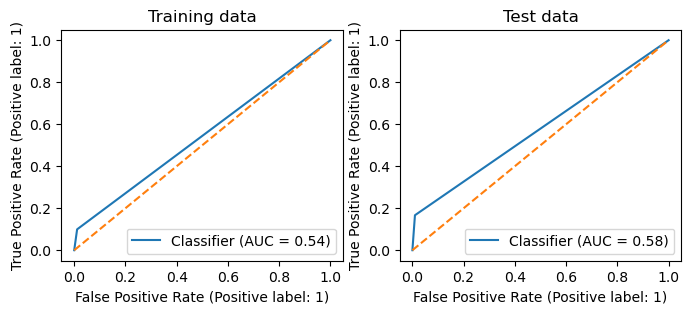

In [26]:
fig, ax =  plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))

_ = RocCurveDisplay.from_predictions(y_train, y_pred_train, ax = ax[0])
_ = RocCurveDisplay.from_predictions(y_test,  y_pred_test,  ax = ax[1])
ax[0].plot([0,1],[0,1],ls = '--');
ax[1].plot([0,1],[0,1],ls = '--');
ax[0].set_title('Training data');
ax[1].set_title('Test data');

#### 4. Кластеризация

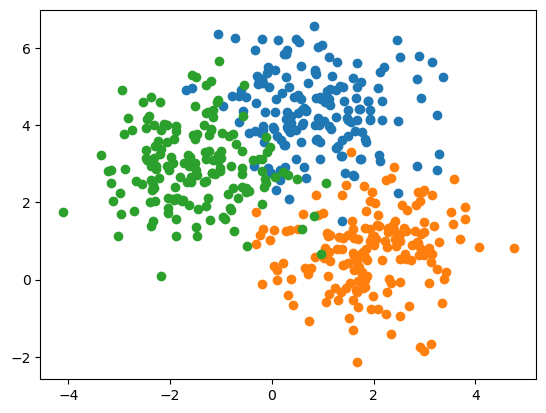

In [27]:
# генерируем искусственные данные

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 500, centers=3, n_features=2, random_state=0)

mask0 = y == 0
mask1 = y == 1
mask2 = y == 2

plt.scatter(X[mask0][:,0],X[mask0][:,1]);
plt.scatter(X[mask1][:,0],X[mask1][:,1]);
plt.scatter(X[mask2][:,0],X[mask2][:,1]);

In [28]:
# Import necessary tools 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

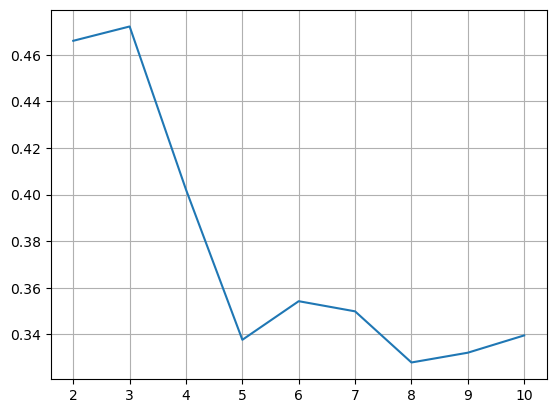

In [29]:
s, k = [],[]
for n in range(2,11):
    km = KMeans(n_clusters = n, n_init = 'auto', random_state = 1)
    km.fit(X)
    labels = km.labels_
    s.append(silhouette_score(X, labels))
    k.append(n)

plt.plot(k,s);
plt.grid();

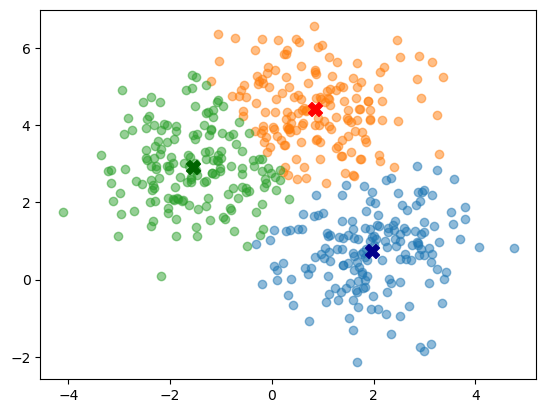

In [30]:
km = KMeans(n_clusters = 3, n_init = 'auto', random_state = 1).fit(X)
labels = km.labels_

c0 = labels == 0
c1 = labels == 1
c2 = labels == 2

plt.scatter(X[c0][:,0],X[c0][:,1], alpha = 0.5);
plt.scatter(X[c1][:,0],X[c1][:,1], alpha = 0.5);
plt.scatter(X[c2][:,0],X[c2][:,1], alpha = 0.5);

plt.scatter(km.cluster_centers_[0,0], km.cluster_centers_[0,1], marker = 'X', c = 'darkblue', s  = 100);
plt.scatter(km.cluster_centers_[1,0], km.cluster_centers_[1,1], marker = 'X', c = 'red', s  = 100);
plt.scatter(km.cluster_centers_[2,0], km.cluster_centers_[2,1], marker = 'X', c = 'darkgreen', s  = 100);